In [10]:
# Full block of code to import, clean, and save the aligned EMA data

import pandas as pd

# Load the dataset
file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema.csv'
df = pd.read_csv(file_path)

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['pid', 'date'])

# Define function to align and clean EMA data
def align_ema_data(group):
    # Separate pss4_EMA rows and phq4_EMA rows
    pss4_rows = group[group['pss4_EMA'].notna()].copy()
    phq4_rows = group[group['phq4_EMA'].notna()].copy()

    aligned_data = []

    # Iterate through pss4 rows and align with closest phq4 row
    for pss_idx, pss_row in pss4_rows.iterrows():
        if not phq4_rows.empty:
            # Find the closest phq4 row by date difference
            closest_phq4_idx = (phq4_rows['date'] - pss_row['date']).abs().idxmin()
            closest_phq4_row = phq4_rows.loc[closest_phq4_idx]

            # Combine pss4 row and closest phq4 row
            combined_row = pss_row.copy()
            combined_row['phq4_EMA'] = closest_phq4_row['phq4_EMA']
            combined_row['phq4_anxiety_EMA'] = closest_phq4_row['phq4_anxiety_EMA']
            combined_row['phq4_depression_EMA'] = closest_phq4_row['phq4_depression_EMA']

            # Append the aligned row to the list
            aligned_data.append(combined_row)

            # Drop the matched phq4 row to avoid reuse
            phq4_rows = phq4_rows.drop(index=closest_phq4_idx)

    # Convert list of aligned rows to DataFrame
    aligned_group = pd.DataFrame(aligned_data)

    # Assign week numbers sequentially
    aligned_group = aligned_group.reset_index(drop=True)
    aligned_group['week'] = ['week' + str(i + 1) for i in range(len(aligned_group))]

    # Drop the date column if it exists
    if 'date' in aligned_group.columns:
        aligned_group.drop(columns=['date'], inplace=True)

    return aligned_group

# Apply function to each group
grouped = df.groupby('pid')
aligned_data = pd.concat([align_ema_data(group) for _, group in grouped], ignore_index=True)
#Drop 'Unnamed: 0' column
aligned_data = aligned_data.drop(columns=['Unnamed: 0'])
# Save the cleaned data to a CSV file
output_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema_cleaned.csv'
aligned_data.to_csv(output_path, index=False)


In [11]:
aligned_data.columns

Index(['pid', 'phq4_EMA', 'phq4_anxiety_EMA', 'phq4_depression_EMA',
       'pss4_EMA', 'positive_affect_EMA', 'negative_affect_EMA', 'week'],
      dtype='object')

In [61]:
# Load the cleaned EMA dataset
cleaned_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema_cleaned.csv'
cleaned_df = pd.read_csv(cleaned_file_path)

# Basic Analysis on the Cleaned EMA Dataset

# Summary statistics for key columns
summary_stats = cleaned_df.describe()

# Count the number of unique participants
unique_participants = cleaned_df['pid'].nunique()

# Distribution of week labels
week_distribution = cleaned_df['week'].value_counts()

# Correlation between stress-related variables
correlation_matrix = cleaned_df[['pss4_EMA', 'phq4_EMA', 'phq4_anxiety_EMA', 'phq4_depression_EMA']].corr()
# Display results
print("Summary Statistics of Cleaned EMA Dataset:\n", summary_stats)
print("\nNumber of Unique Participants:", unique_participants)
print("\nWeek Distribution in Cleaned EMA Dataset:\n", week_distribution)
print("\nCorrelation Matrix of Stress-Related Variables:\n", correlation_matrix)



Summary Statistics of Cleaned EMA Dataset:
           phq4_EMA  phq4_anxiety_EMA  phq4_depression_EMA     pss4_EMA  \
count  2167.000000       2167.000000          2167.000000  2167.000000   
mean      3.140748          1.800646             1.340102     6.478542   
std       2.858955          1.617922             1.505966     2.799284   
min       0.000000          0.000000             0.000000     0.000000   
25%       1.000000          0.000000             0.000000     5.000000   
50%       3.000000          2.000000             1.000000     7.000000   
75%       5.000000          2.000000             2.000000     8.000000   
max      12.000000          6.000000             6.000000    16.000000   

       positive_affect_EMA  negative_affect_EMA  
count          2166.000000          2167.000000  
mean              7.808864             3.598985  
std               4.644442             3.675712  
min               0.000000             0.000000  
25%               4.000000             

In [62]:


# Calculate the percentage of missing values for each column
missing_percentage_per_column = cleaned_df.isnull().mean() * 100
print("Percentage of missing data per column:\n", missing_percentage_per_column)

# Calculate the total percentage of missing data
total_missing_percentage = cleaned_df.isnull().mean().mean() * 100
print("\nTotal percentage of missing data in the dataset: {:.2f}%".format(total_missing_percentage))


Percentage of missing data per column:
 pid                    0.000000
phq4_EMA               0.000000
phq4_anxiety_EMA       0.000000
phq4_depression_EMA    0.000000
pss4_EMA               0.000000
positive_affect_EMA    0.046147
negative_affect_EMA    0.000000
week                   0.000000
dtype: float64

Total percentage of missing data in the dataset: 0.01%


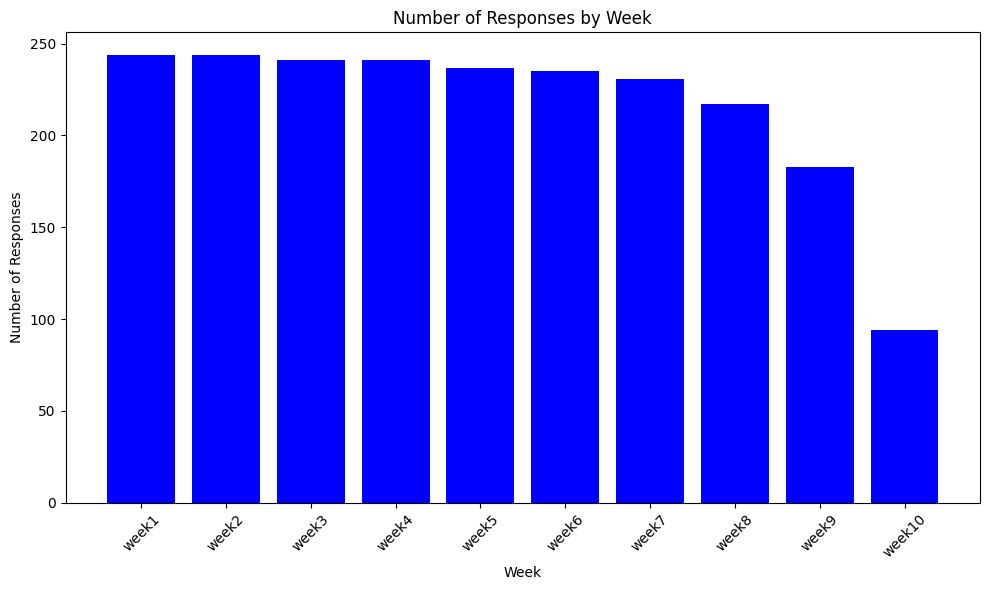

In [74]:
import matplotlib.pyplot as plt
# Calculate the distribution of week labels
week_distribution = cleaned_df['week'].value_counts()

# Plot the number of responses by week
plt.figure(figsize=(10, 6))
plt.bar(week_distribution.index, week_distribution.values, color='blue')
plt.xlabel('Week')
plt.ylabel('Number of Responses')
plt.title('Number of Responses by Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


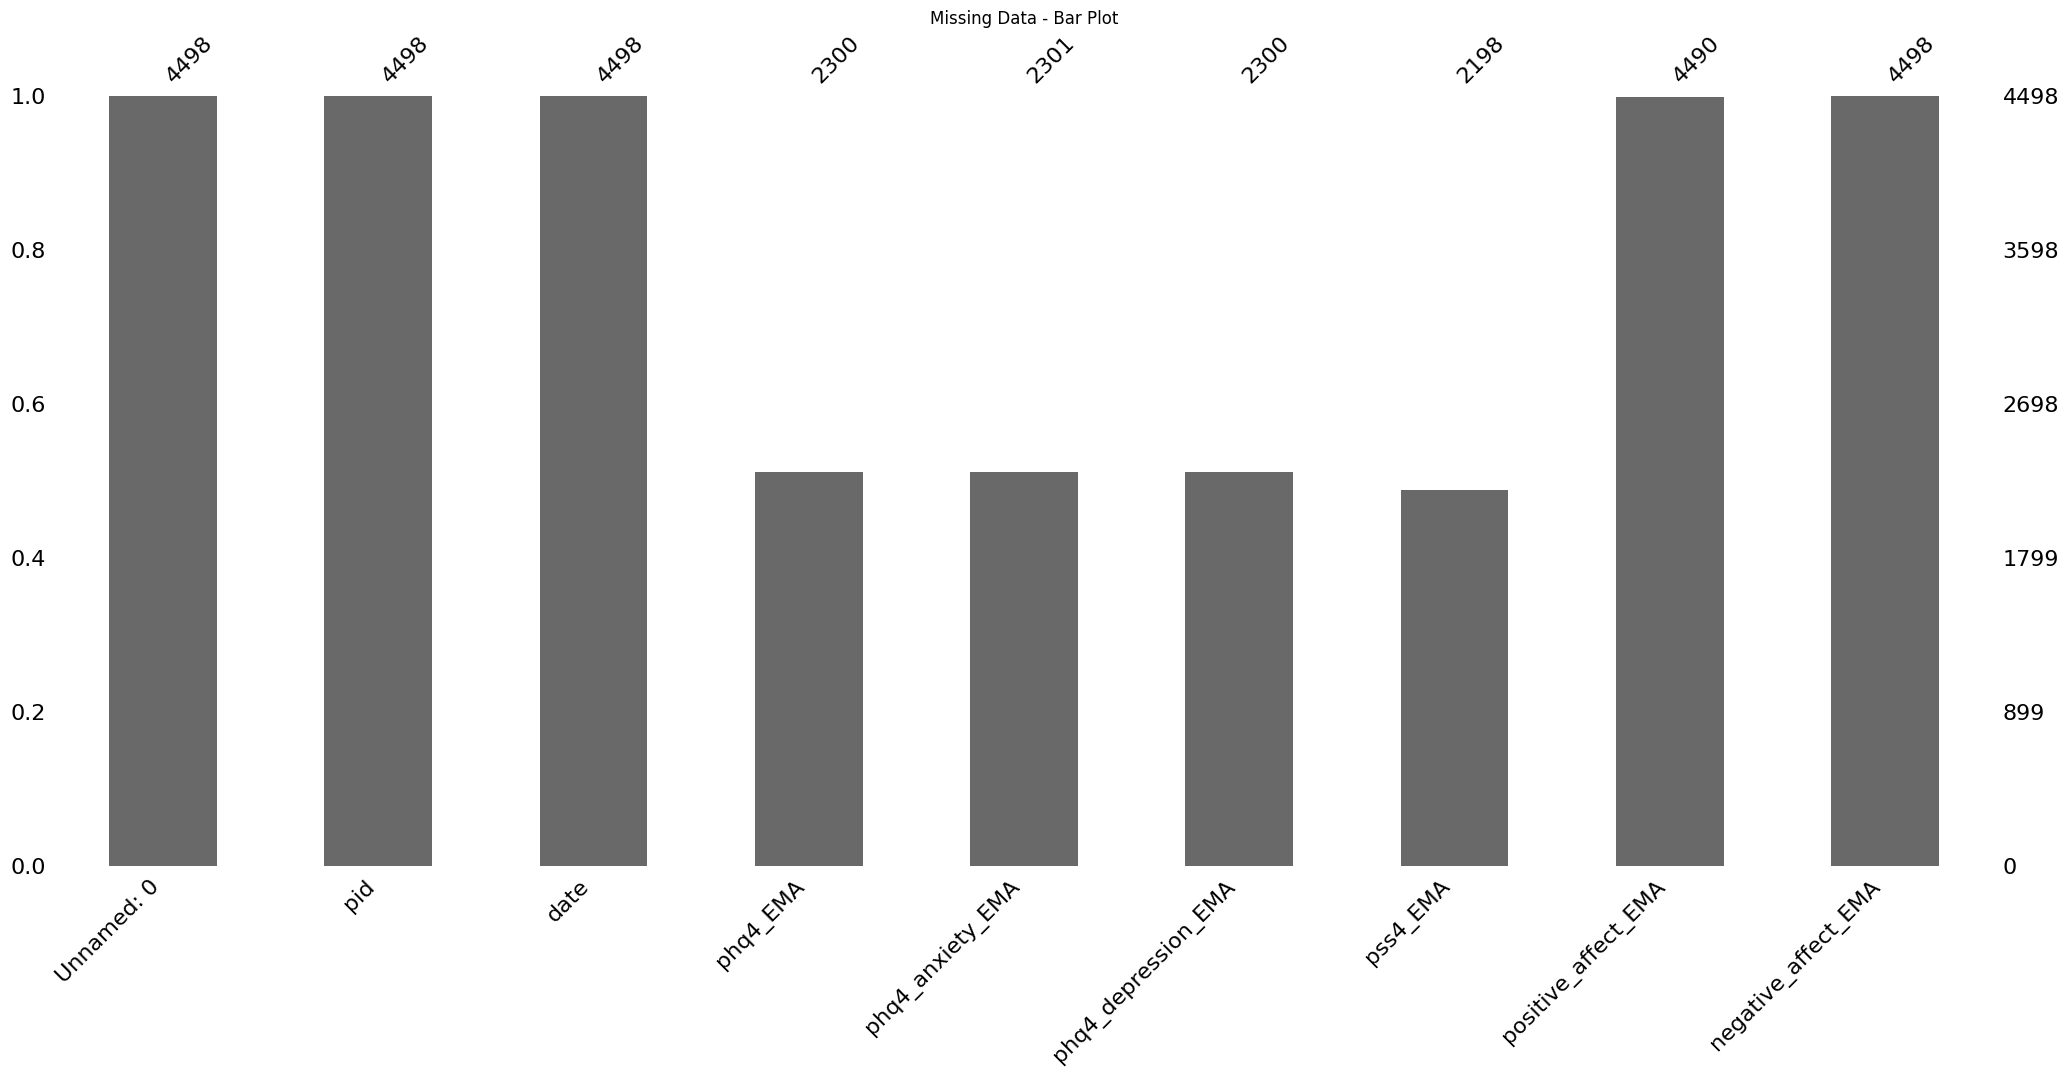

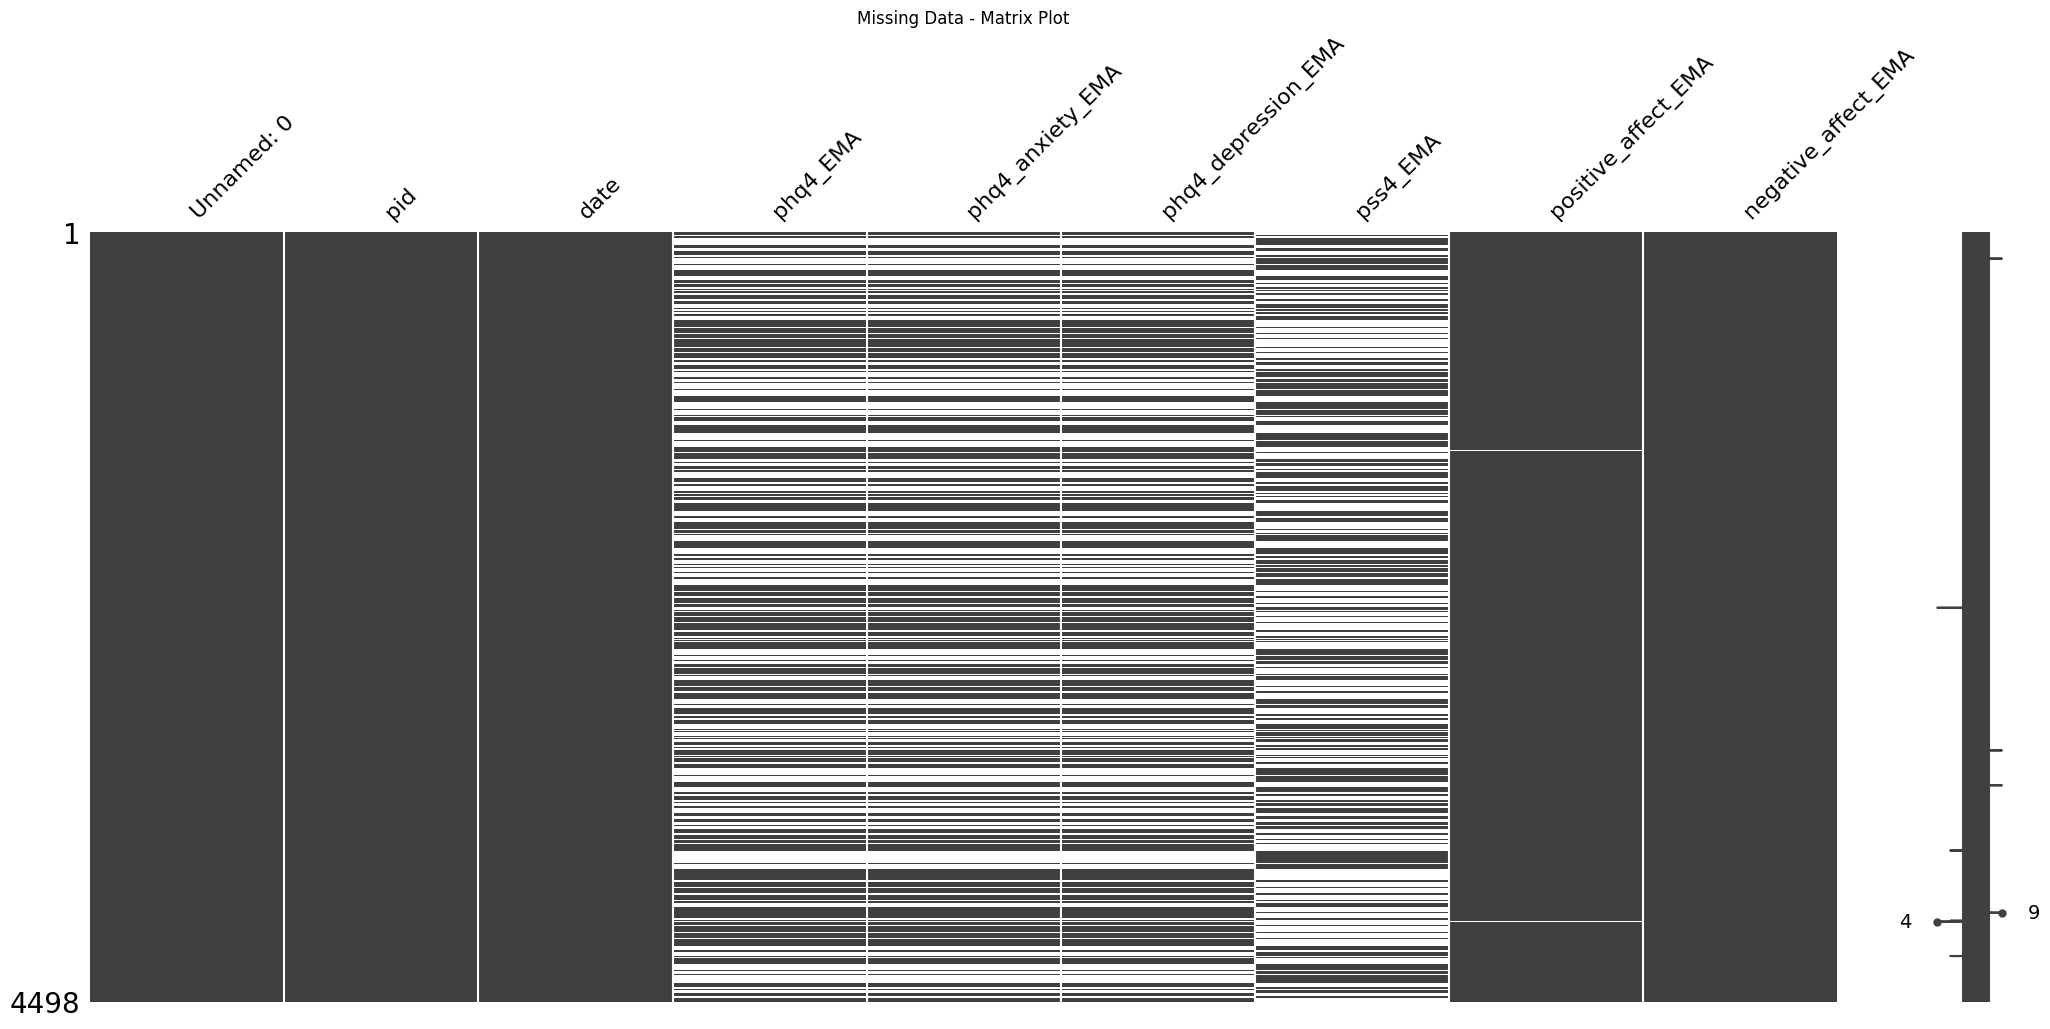

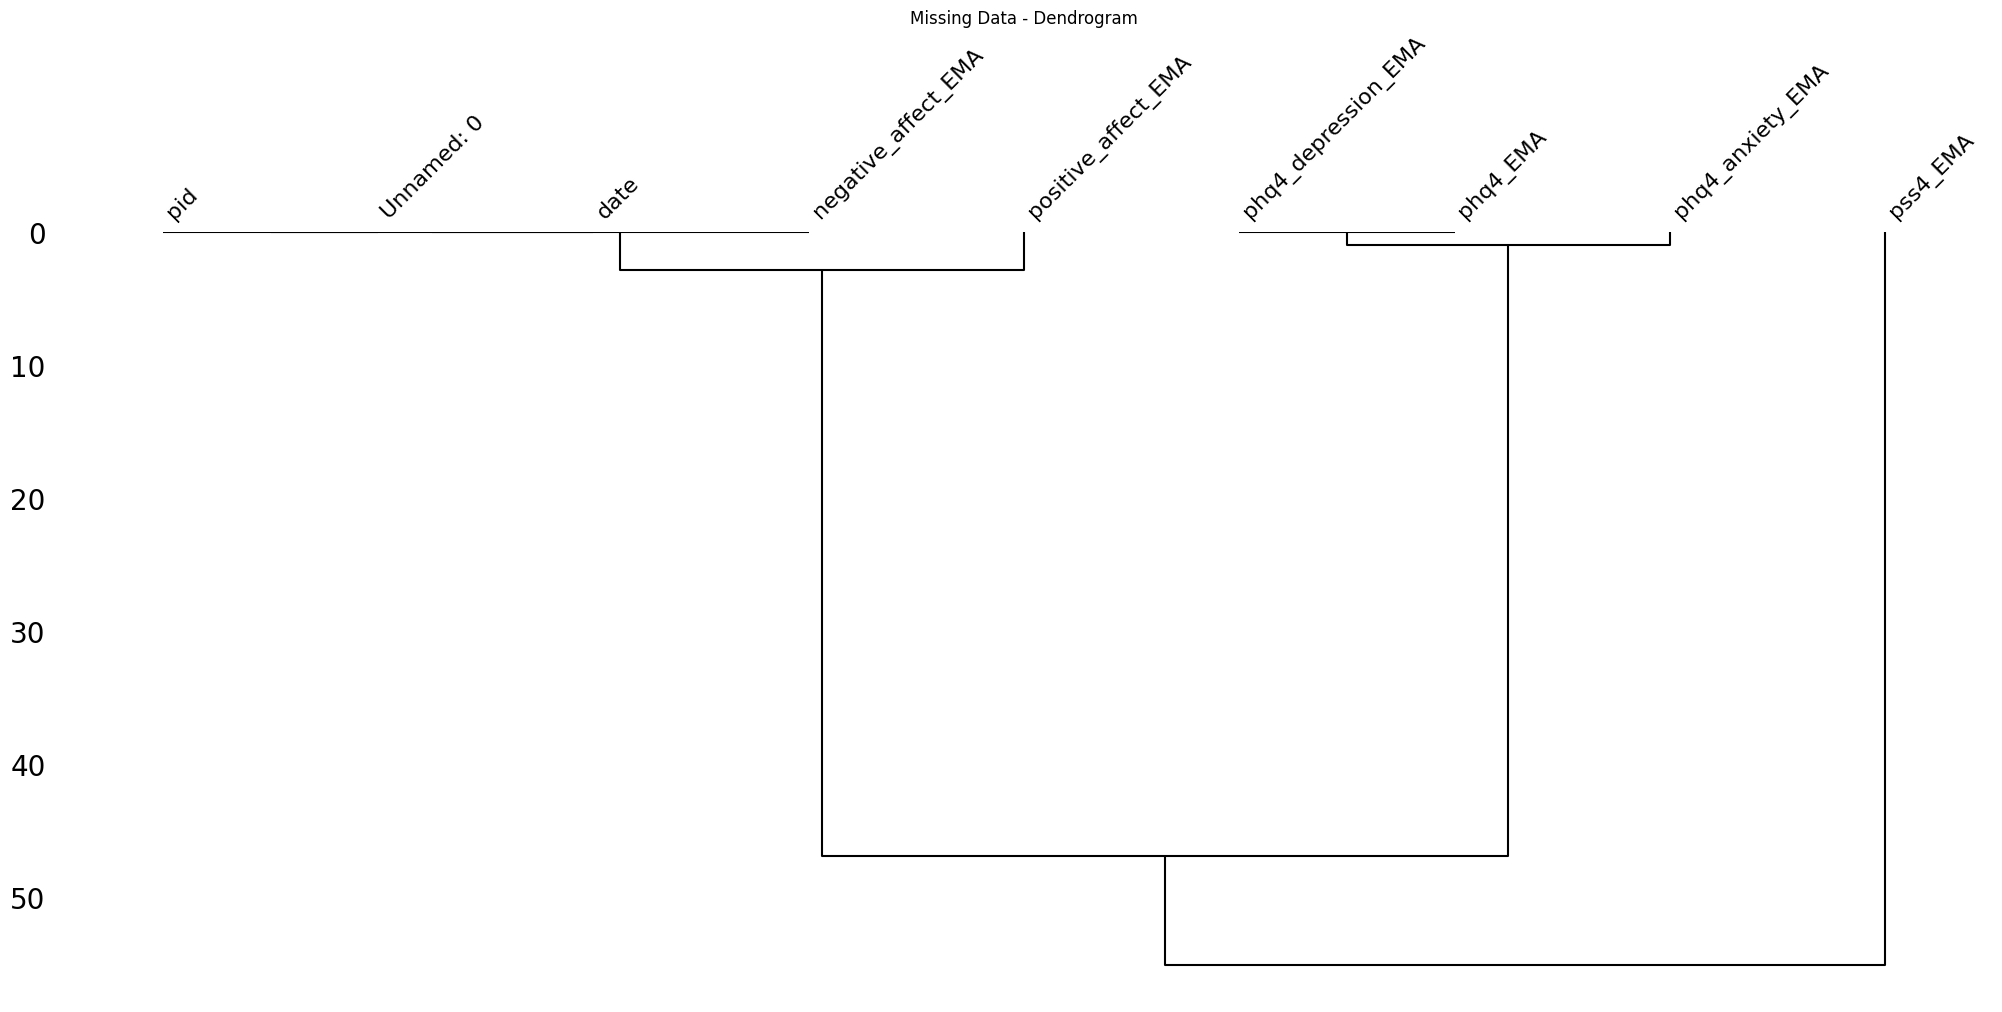

In [66]:
import missingno as msno
file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema.csv'
ema_df = pd.read_csv(file_path)
# Bar plot of missing values
msno.bar(ema_df)
plt.title('Missing Data - Bar Plot')
plt.show()

# Matrix plot of missing values
msno.matrix(ema_df)
plt.title('Missing Data - Matrix Plot')
plt.show()

# Dendrogram to visualize patterns of missing data
msno.dendrogram(ema_df)
plt.title('Missing Data - Dendrogram')
plt.show()


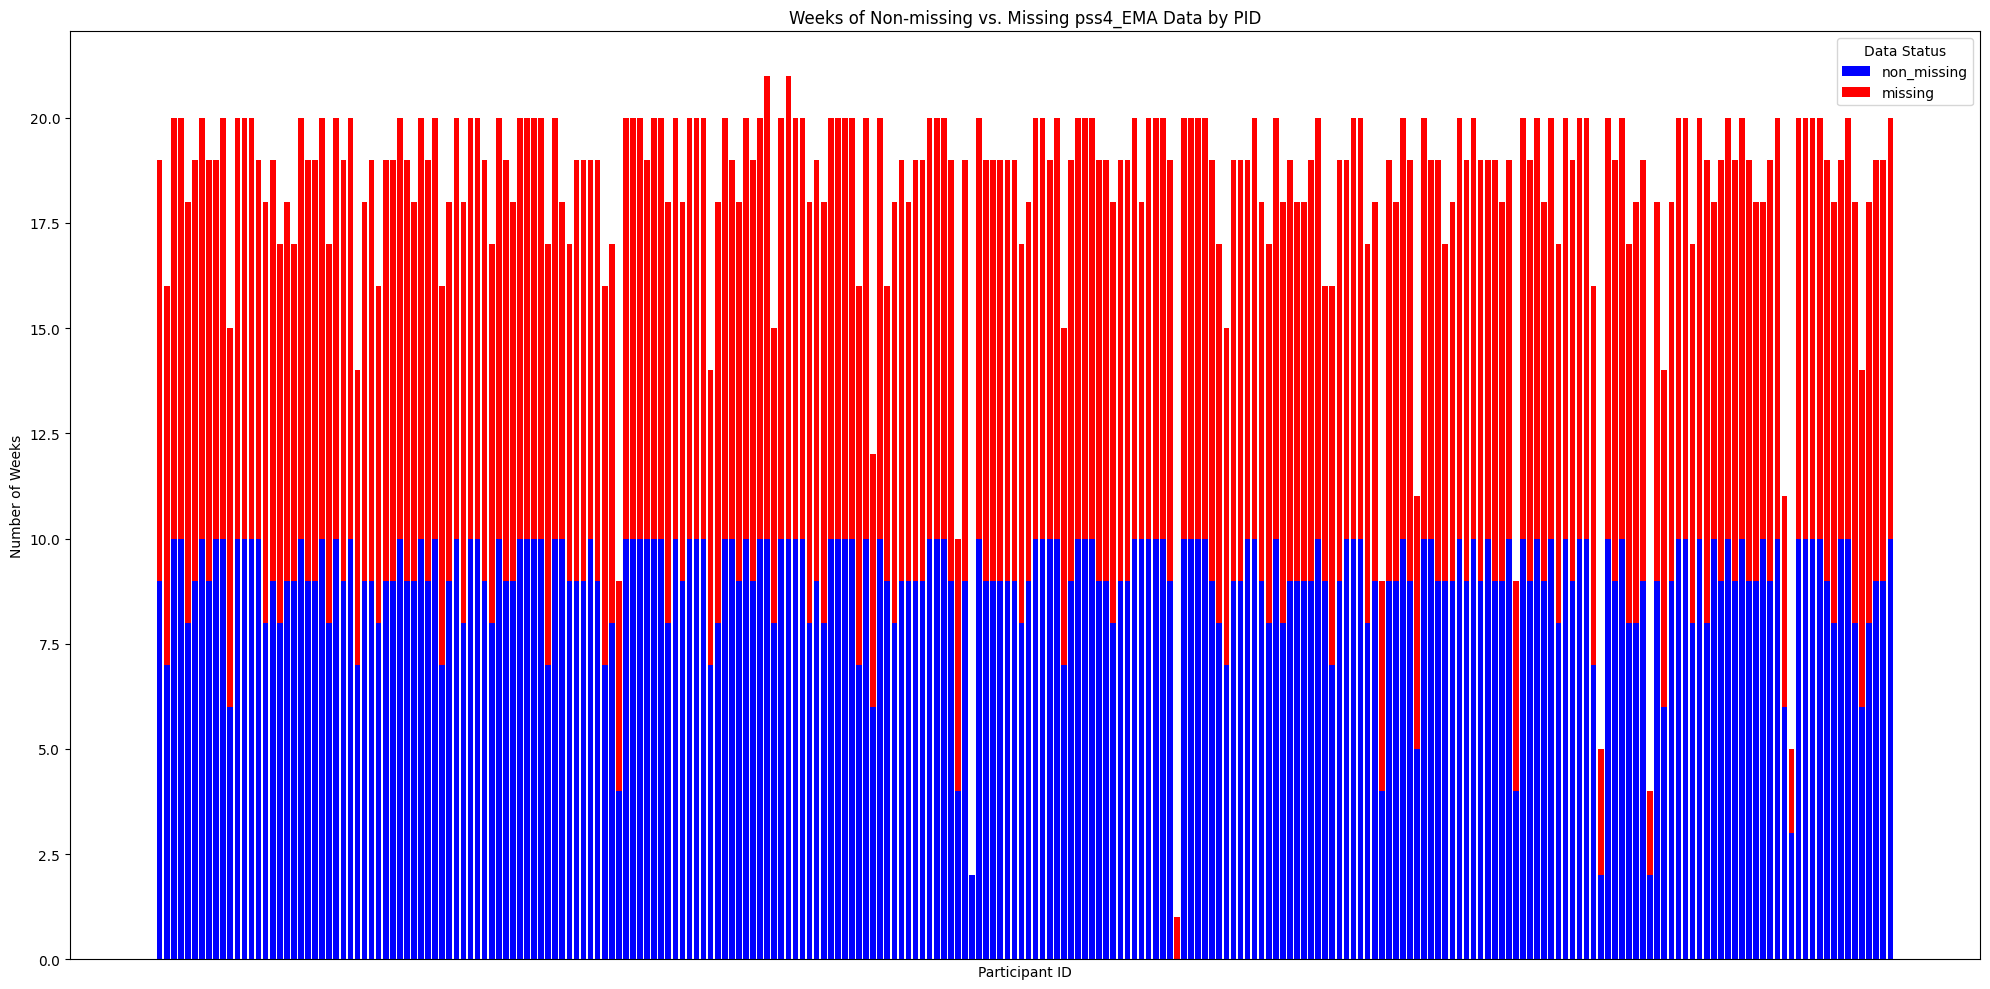

In [73]:
# Convert date to datetime
ema_df['date'] = pd.to_datetime(ema_df['date'], format='%Y-%m-%d')

# Add a "week" column to represent week number within the study
ema_df['week'] = ema_df['date'].dt.isocalendar().week

# Create a column to mark missing vs non-missing values for 'pss4_EMA'
ema_df['pss4_missing'] = ema_df['pss4_EMA'].isnull().astype(int)  # 1 for missing, 0 for non-missing

# Group by participant (pid) and week, then aggregate the number of missing and non-missing responses
missing_summary = ema_df.groupby(['pid', 'week'])['pss4_missing'].agg(['sum', 'count']).reset_index()
missing_summary.rename(columns={'sum': 'missing_count', 'count': 'total_count'}, inplace=True)
missing_summary['non_missing_count'] = missing_summary['total_count'] - missing_summary['missing_count']

# Pivot the data for visualization
pivot_missing = missing_summary.pivot(index='pid', columns='week', values='missing_count').fillna(0)
pivot_non_missing = missing_summary.pivot(index='pid', columns='week', values='non_missing_count').fillna(0)

# Plot the stacked bar chart of missing vs. non-missing data
plt.figure(figsize=(20, 10))

for i, pid in enumerate(pivot_missing.index):
    plt.bar(i, pivot_non_missing.loc[pid].sum(), color='blue', label='non_missing' if i == 0 else "")
    plt.bar(i, pivot_missing.loc[pid].sum(), bottom=pivot_non_missing.loc[pid].sum(), color='red', label='missing' if i == 0 else "")

# Customize the plot
plt.xlabel('Participant ID')
plt.ylabel('Number of Weeks')
plt.title('Weeks of Non-missing vs. Missing pss4_EMA Data by PID')
plt.xticks([], [])
plt.legend(title='Data Status', loc='upper right')
plt.tight_layout()
plt.show()

Matplotlib is building the font cache; this may take a moment.


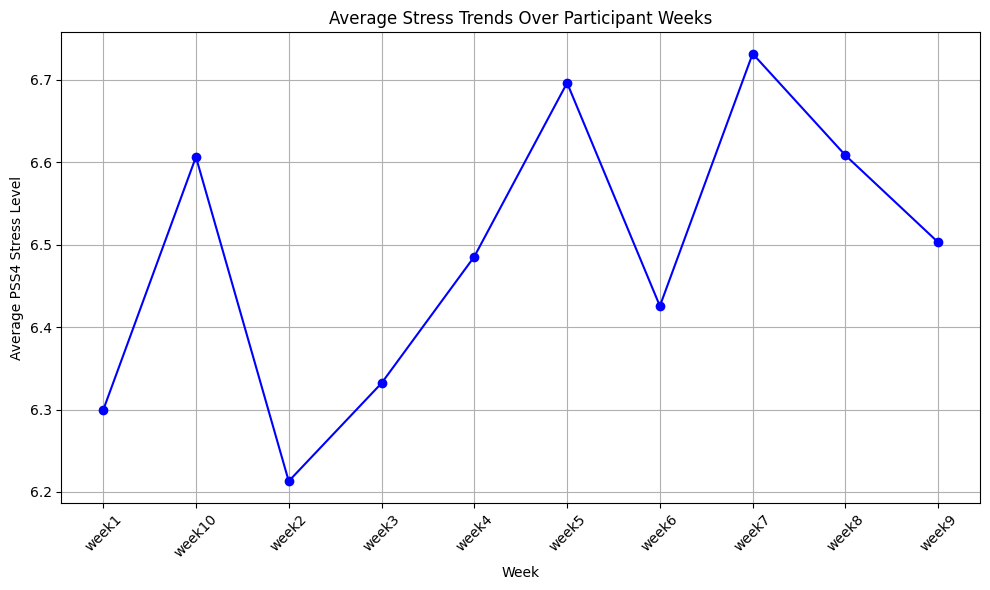

In [15]:
import matplotlib.pyplot as plt

# Plotting stress trends over participant weeks

# Group data by week and calculate average pss4_EMA
avg_pss4_by_week = cleaned_df.groupby('week')['pss4_EMA'].mean()

# Plotting the average stress levels (pss4_EMA) by week
plt.figure(figsize=(10, 6))
plt.plot(avg_pss4_by_week.index, avg_pss4_by_week.values, marker='o', linestyle='-', color='b')
plt.xlabel('Week')
plt.ylabel('Average PSS4 Stress Level')
plt.title('Average Stress Trends Over Participant Weeks')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


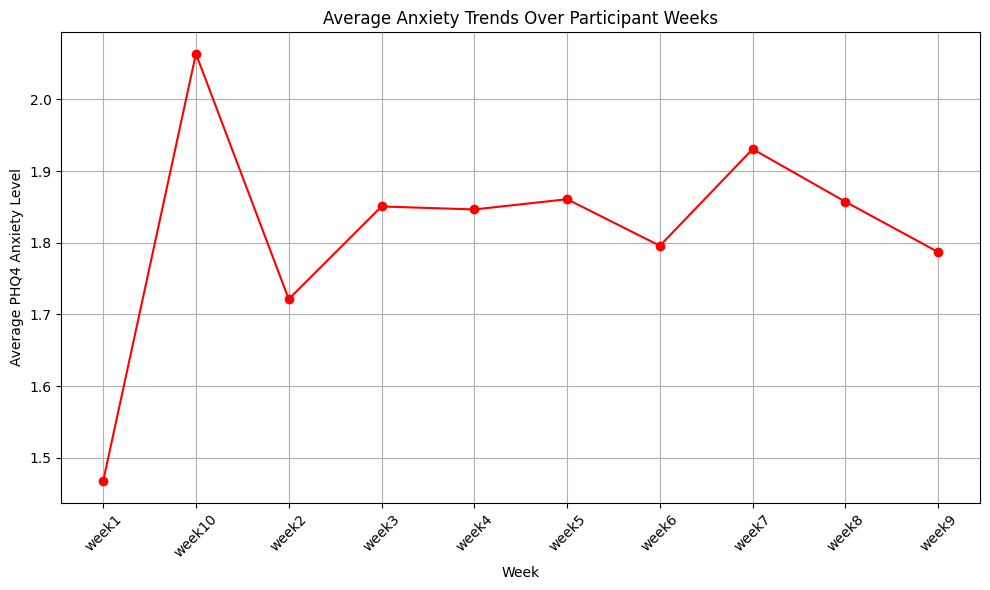

In [16]:
# Group data by week and calculate average phq4_anxiety_EMA
avg_anxiety_by_week = cleaned_df.groupby('week')['phq4_anxiety_EMA'].mean()

# Plotting the average anxiety levels (phq4_anxiety_EMA) by week
plt.figure(figsize=(10, 6))
plt.plot(avg_anxiety_by_week.index, avg_anxiety_by_week.values, marker='o', linestyle='-', color='r')
plt.xlabel('Week')
plt.ylabel('Average PHQ4 Anxiety Level')
plt.title('Average Anxiety Trends Over Participant Weeks')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


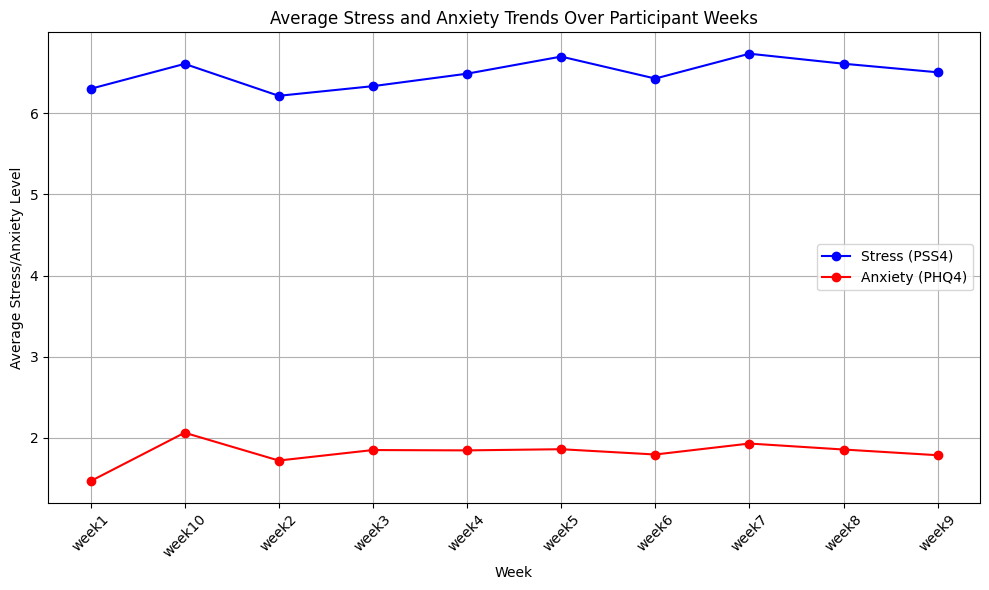

In [17]:


# Plotting the average stress levels (pss4_EMA) and anxiety levels (phq4_anxiety_EMA) by week
plt.figure(figsize=(10, 6))
plt.plot(avg_pss4_by_week.index, avg_pss4_by_week.values, marker='o', linestyle='-', color='b', label='Stress (PSS4)')
plt.plot(avg_anxiety_by_week.index, avg_anxiety_by_week.values, marker='o', linestyle='-', color='r', label='Anxiety (PHQ4)')
plt.xlabel('Week')
plt.ylabel('Average Stress/Anxiety Level')
plt.title('Average Stress and Anxiety Trends Over Participant Weeks')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


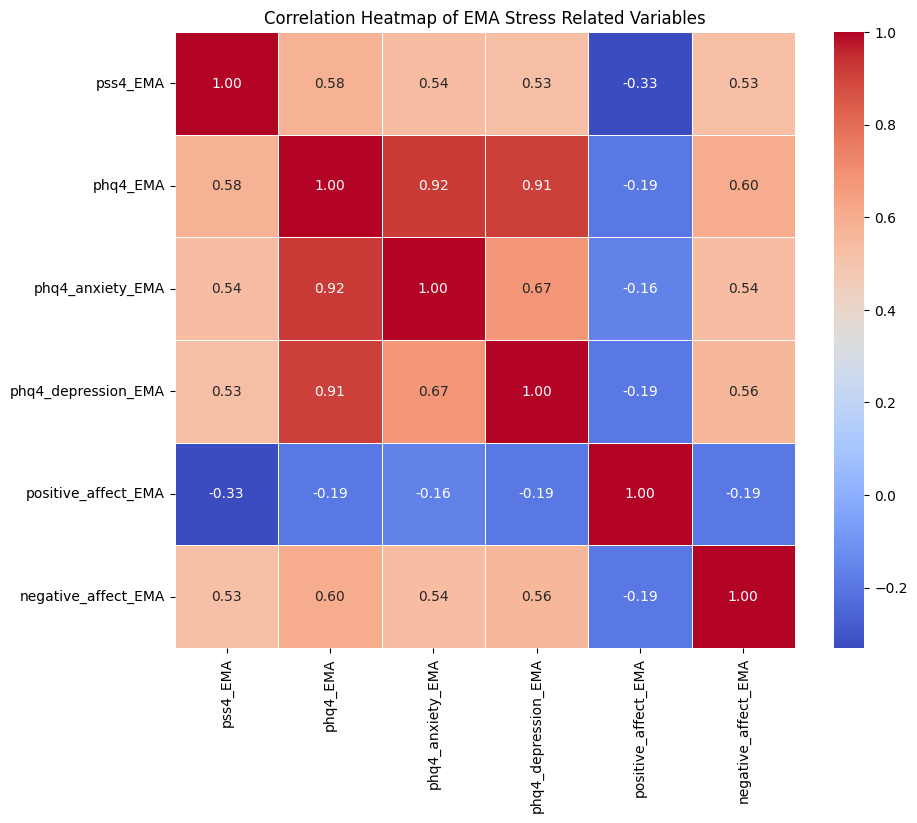

In [60]:
import seaborn as sns

# Correlation matrix of key variables in the dataset
correlation_matrix = cleaned_df[['pss4_EMA', 'phq4_EMA', 'phq4_anxiety_EMA', 'phq4_depression_EMA', 'positive_affect_EMA', 'negative_affect_EMA']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of EMA Stress Related Variables')
plt.show()


# Exploratory Data Analysis (EDA) Observations

## 1. Summary Statistics
The summary statistics for key columns (`pss4_EMA`, `phq4_EMA`, `phq4_anxiety_EMA`, `phq4_depression_EMA`, `positive_affect_EMA`, `negative_affect_EMA`) provide insights into the central tendency and dispersion:
- The mean and median values indicate general trends in participants' responses.
- The standard deviations show variability, with `pss4_EMA` and `negative_affect_EMA` having relatively higher variability compared to others.
- The minimum and maximum values confirm the range for each measure, which helps identify any potential outliers.

## 2. Number of Unique Participants
- The dataset contains **244 unique participants** (`pid`), which provides a good sample size for analyzing trends and relationships.

## 3. Week Distribution
- The dataset includes responses spread across different weeks (`week1`, `week2`, etc.).
- Some weeks have more responses than others, indicating that not all participants responded consistently every week. This highlights the importance of accounting for missing data and irregular survey participation in the analysis.

## 4. Correlation Matrix of Key Variables
The correlation matrix was used to determine the relationships between stress, anxiety, depression, and affect measures:
- **Stress (`pss4_EMA`) and Anxiety (`phq4_anxiety_EMA`)**: A moderate positive correlation of **0.54** was found, indicating that as anxiety levels increase, stress levels also tend to increase.
- **`phq4_EMA`, `phq4_anxiety_EMA`, and `phq4_depression_EMA`**: These three variables are highly correlated with each other:
  - `phq4_EMA` has a correlation of **0.92** with `phq4_anxiety_EMA` and **0.91** with `phq4_depression_EMA`, indicating that participants' overall mental health scores are strongly linked with their anxiety and depression levels.
- **Negative Correlation with Positive Affect**:
  - `positive_affect_EMA` has a negative correlation of **-0.33** with `pss4_EMA` and **-0.19** with `negative_affect_EMA`, suggesting that higher levels of positive affect are associated with lower stress and negative affect.
- **`negative_affect_EMA` and `pss4_EMA`**: A moderate correlation of **0.53** suggests that as negative affect increases, stress levels tend to increase as well.

## 5. Stress and Anxiety Trends Over Weeks
- **Stress Trends**:
  - The average stress levels (`pss4_EMA`) over the weeks show fluctuations, with certain peaks and dips.
  - The overall trend indicates variability in participants' stress levels over time, highlighting the influence of different factors such as personal circumstances or seasonal changes.
- **Anxiety Trends**:
  - The average anxiety levels (`phq4_anxiety_EMA`) over the weeks are generally more stable compared to stress but do show slight variations.
  - Peaks in anxiety levels were observed in some weeks, which may align with specific events or periods during the study.
- **Comparison of Stress and Anxiety**:
  - The comparison of stress and anxiety trends indicates that, while they are positively correlated, they do not always move together in the same pattern week by week. This suggests that other factors may independently influence either stress or anxiety.

## 6. Heatmap of Correlation Matrix
The heatmap of the correlation matrix provided visual insights into the relationships between the variables:
- **High Correlations**:
  - Variables related to mental health (`phq4_EMA`, `phq4_anxiety_EMA`, `phq4_depression_EMA`) are highly correlated, indicating that participants experiencing one symptom (e.g., anxiety) are likely to experience others (e.g., depression).
- **Moderate Correlations**:
  - `pss4_EMA` (stress) shows a moderate positive correlation with `negative_affect_EMA`, indicating a relationship between negative affect and increased stress.
- **Negative Correlations**:
  - `positive_affect_EMA` is negatively correlated with stress and negative affect, suggesting that positive emotional experiences may help mitigate stress and reduce negative affect.

These findings highlight the importance of considering multiple emotional and psychological factors when analyzing stress and anxiety, as they tend to interact with each other in complex ways.

---

Overall, the EDA helped identify relationships and trends within the data, providing a foundational understanding of how different measures of emotional and psychological well-being are connected. These insights will guide further modeling and analysis of stress and anxiety prediction.


# Working with Post Survey Data

In [56]:

def clean_post_survey_data(file_path):
    """
    Cleans the post-study survey dataset by:
    1. Removing irrelevant columns.
    2. Handling missing values using median imputation.

    Parameters:
    file_path (str): The path to the post-study CSV file.

    Returns:
    pd.DataFrame: Cleaned DataFrame ready for analysis.
    """
    # Load the dataset
    post_df = pd.read_csv(file_path)

    # Remove irrelevant columns
    columns_to_drop = ['Unnamed: 0', 'date', 'BYAACQ_POST']
    post_df.drop(columns=[col for col in columns_to_drop if col in post_df.columns], inplace=True)

    # Handle missing values using median imputation for numerical columns
    for column in post_df.columns:
        if post_df[column].dtype in ['float64', 'int64']:
            post_df[column].fillna(post_df[column].median(), inplace=True)

    return post_df

# Example usage
cleaned_post_df = clean_post_survey_data('globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/post.csv')
cleaned_post_df.to_csv('globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/post_cleaned.csv', index=False)
cleaned_post_df.head()


/var/folders/f_/gv9ztf6972s0pmw0mkbfw0vc0000gn/T/ipykernel_34642/3304404881.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  post_df[column].fillna(post_df[column].median(), inplace=True)
/var/folders/f_/gv9ztf6972s0pmw0mkbfw0vc0000gn/T/ipykernel_34642/3304404881.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

,pid,UCLA_10items_POST,SocialFit_POST,2waySSS_receiving_emotional_POST,2waySSS_giving_emotional_POST,2waySSS_giving_instrumental_POST,2waySSS_receiving_instrumental_POST,ERQ_reappraisal_POST,ERQ_suppression_POST,BRS_POST,...,STAI_POST,MAAS_15items_POST,CESD_9items_POST,BDI2_POST,BriefCope_adaptive_POST,BriefCope_maladaptive_POST,GQ_POST,FSPWB_POST,EDS_POST,CEDH_POST
0,INS-W_300,27.0,72.0,22.0,13.0,9.0,11.0,4.000000,5.25,4.000000,...,55.0,1.933333,15.0,13.0,1.0000,1.583333,29.0,33.0,9.0,16.0
1,INS-W_301,18.0,77.0,30.0,18.0,13.0,17.0,4.833333,4.75,4.000000,...,22.0,4.266667,3.0,0.0,1.3750,0.416667,35.0,46.0,0.0,0.0
2,INS-W_302,18.0,81.0,23.0,16.0,16.0,13.0,4.333333,4.25,2.666667,...,39.0,4.866667,6.0,1.0,1.2500,0.833333,27.0,43.0,9.0,21.0
3,INS-W_303,16.0,78.0,32.0,15.0,20.0,17.0,4.666667,2.00,4.000000,...,34.0,4.200000,1.0,0.0,1.3125,0.416667,37.0,47.0,0.0,7.0
4,INS-W_304,27.0,71.0,15.0,15.0,11.0,11.0,4.666667,5.00,2.333333,...,57.0,2.866667,14.0,21.0,2.0000,1.250000,34.0,39.0,13.0,29.0


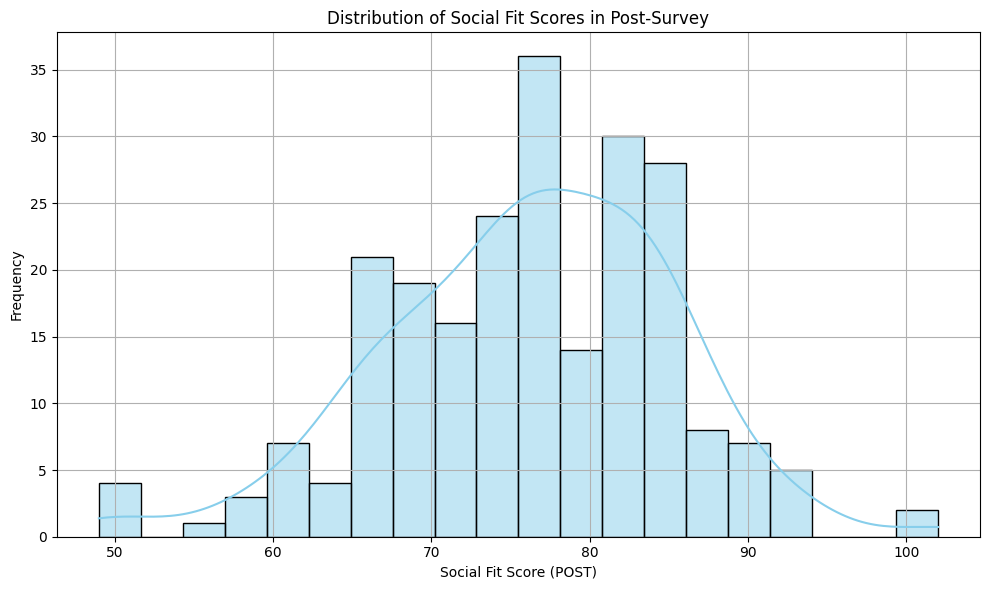

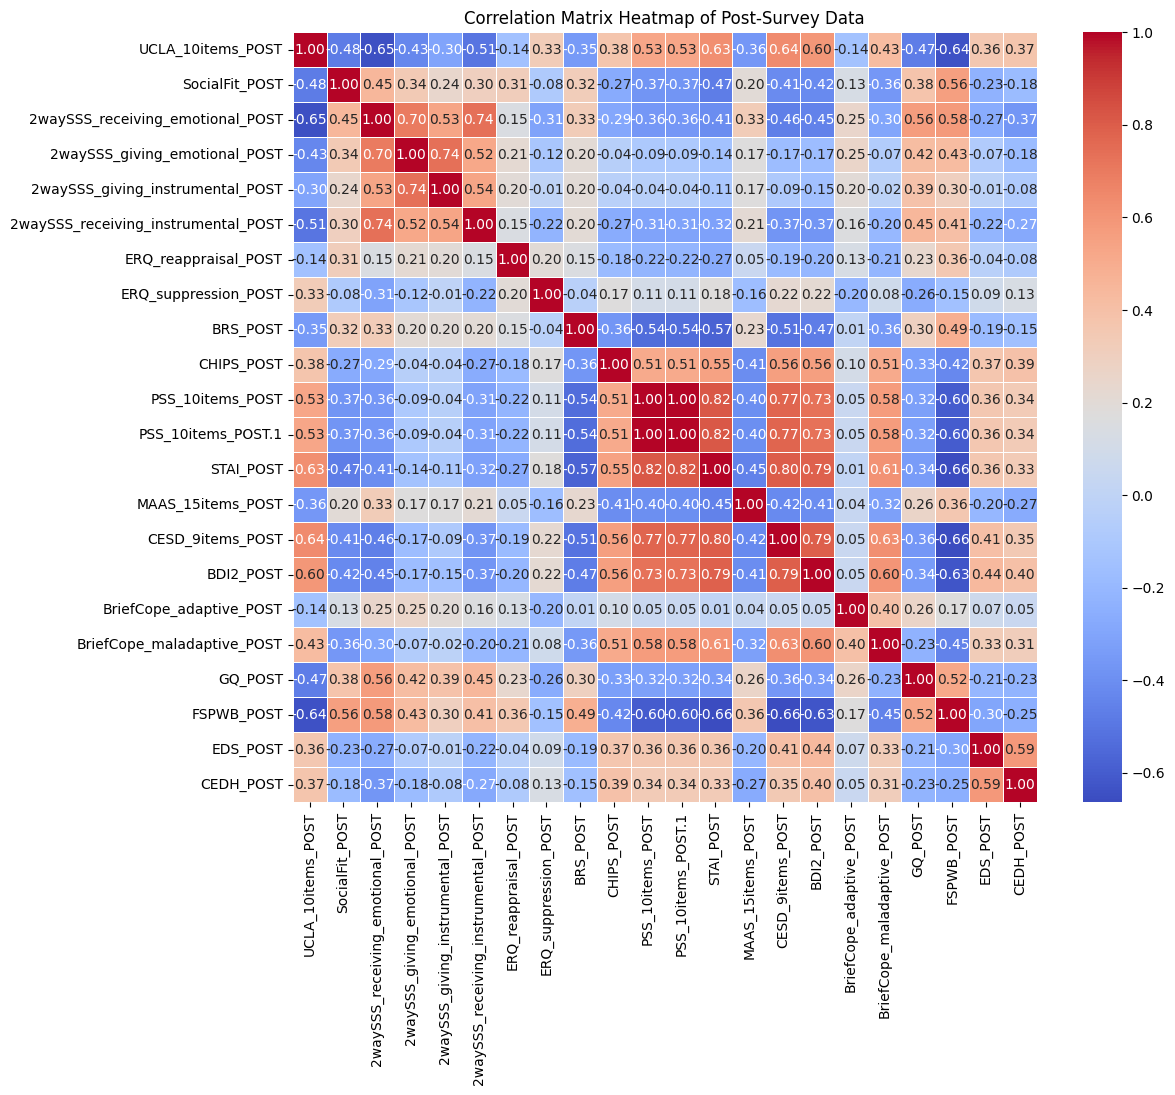

In [36]:
# Load the cleaned post-survey dataset
cleaned_post_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/post_cleaned.csv'
cleaned_post_df = pd.read_csv(cleaned_post_file_path)
# Exploratory Data Analysis (EDA) on the cleaned post-study questionnaire dataset
# Drop non-numeric columns (like participant IDs) for numerical analysis
numeric_df = cleaned_post_df.select_dtypes(include=['float64', 'int64'])
# Summary statistics for key columns
post_summary_stats = numeric_df.describe()

# Correlation matrix to understand relationships between variables
post_correlation_matrix = numeric_df.corr()

# Distribution of Social Fit Scores
social_fit_distribution = cleaned_post_df['SocialFit_POST'].value_counts().sort_index()

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Social Fit scores
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_post_df['SocialFit_POST'], bins=20, kde=True, color='skyblue')
plt.xlabel('Social Fit Score (POST)')
plt.ylabel('Frequency')
plt.title('Distribution of Social Fit Scores in Post-Survey')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(post_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap of Post-Survey Data')
plt.show()


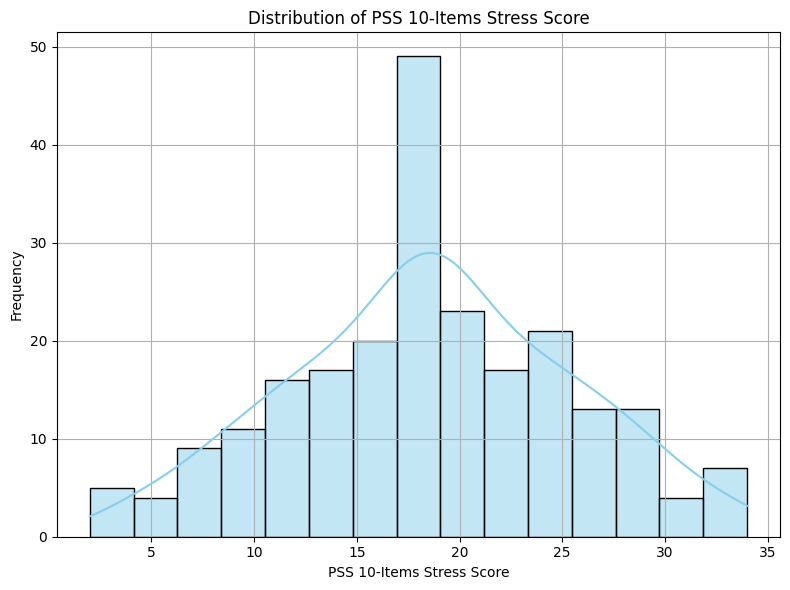

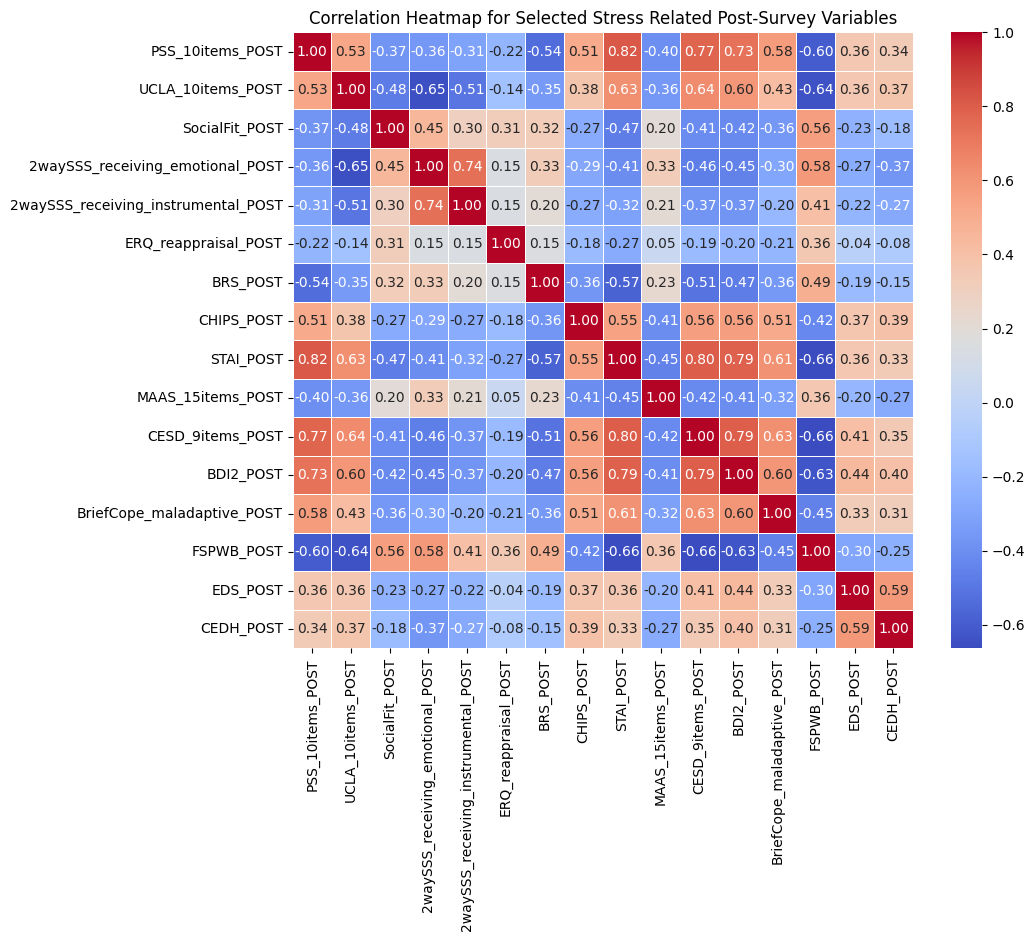

In [59]:
# Exploring data trends for stress levels in the post-study dataset (revised)

# Plotting the distribution of stress levels (PSS 10-items)
plt.figure(figsize=(8, 6))

# PSS 10-items distribution
sns.histplot(cleaned_post_df['PSS_10items_POST'], bins=15, kde=True, color='skyblue')
plt.xlabel('PSS 10-Items Stress Score')
plt.ylabel('Frequency')
plt.title('Distribution of PSS 10-Items Stress Score')
plt.grid(True)

plt.tight_layout()
plt.show()


# Select relevant columns for correlation analysis
selected_columns = [
    'PSS_10items_POST', 
    'UCLA_10items_POST', 'SocialFit_POST', '2waySSS_receiving_emotional_POST', 
    '2waySSS_receiving_instrumental_POST', 'ERQ_reappraisal_POST', 
     'BRS_POST', 'CHIPS_POST',  'STAI_POST', 'MAAS_15items_POST', 'CESD_9items_POST', 
    'BDI2_POST', 'BriefCope_maladaptive_POST', 
    'FSPWB_POST', 'EDS_POST', 'CEDH_POST', 
    
]
# Correlation between stress scores and other key variables
#stress_correlation = cleaned_post_df[['PSS_10items_POST', 'BRS_POST', 'ERQ_reappraisal_POST', 'ERQ_suppression_POST', 'SocialFit_POST']].corr()
stress_correlation = cleaned_post_df[selected_columns].corr()

# Plotting the correlation heatmap for stress-related variables
plt.figure(figsize=(10, 8))
sns.heatmap(stress_correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap for Selected Stress Related Post-Survey Variables')
plt.show()


# Fitting Models and checking performance

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the cleaned weekly EMA dataset
cleaned_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema_cleaned.csv'
weekly_df = pd.read_csv(cleaned_file_path)

# Load the post-survey dataset to get the target variable (final stress scores)
post_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/post_cleaned.csv'
post_df = pd.read_csv(post_file_path)

# One-Hot Encode the 'week' column
weekly_df = pd.get_dummies(weekly_df, columns=['week'], drop_first=True)

# Merge weekly EMA data with post-survey data on 'pid'
merged_df = pd.merge(weekly_df, post_df[['pid', 'PSS_10items_POST']], on='pid')

# Drop the 'pid' column as it is a non-numeric identifier
merged_df.drop(columns=['pid'], inplace=True)

# Check for NaN values in the merged dataset and handle them
merged_df.fillna(merged_df.median(), inplace=True)

# Prepare features (X) and target (y)
X = merged_df.drop(columns=['PSS_10items_POST'])
y = merged_df['PSS_10items_POST']

# Ensure X contains only numeric data
X = X.select_dtypes(include=[np.number])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the performance
    print(f"{model_name} Performance:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R² Score: {r2:.2f}\n")




Linear Regression Performance:
  Mean Absolute Error (MAE): 3.79
  Mean Squared Error (MSE): 23.30
  R² Score: 0.49
Random Forest Regressor Performance:
  Mean Absolute Error (MAE): 4.08
  Mean Squared Error (MSE): 28.29
  R² Score: 0.38


/var/folders/f_/gv9ztf6972s0pmw0mkbfw0vc0000gn/T/ipykernel_34642/1184813259.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


Random Forest Regressor Performance:
  Mean Absolute Error (MAE): 4.08
  Mean Squared Error (MSE): 28.28
  R² Score: 0.38

Top 10 Most Important Features:
               Feature  Importance
3             pss4_EMA    0.415457
0             phq4_EMA    0.241284
4  positive_affect_EMA    0.154342
5  negative_affect_EMA    0.110694
1     phq4_anxiety_EMA    0.042373
2  phq4_depression_EMA    0.035850


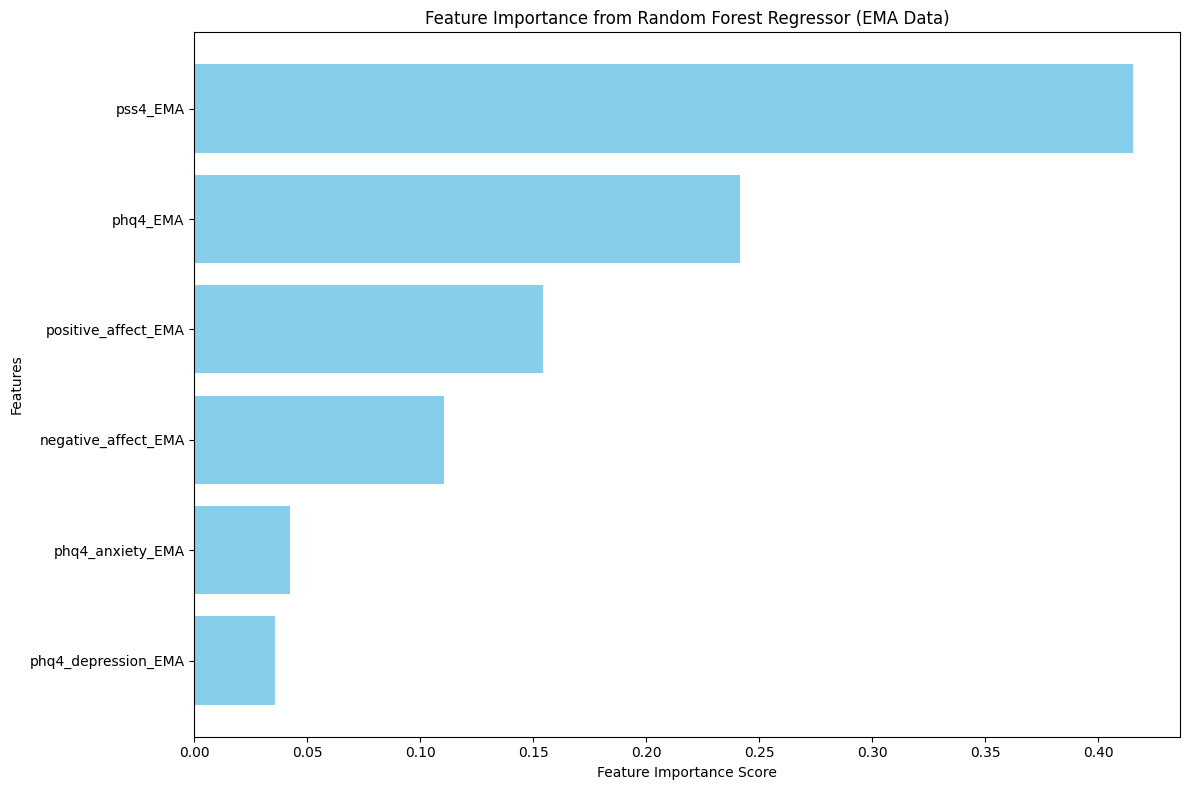

In [44]:
# Load the cleaned weekly EMA dataset
cleaned_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema_cleaned.csv'
weekly_df = pd.read_csv(cleaned_file_path)

# Load the post-survey dataset to get the target variable (final stress scores)
post_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/post_cleaned.csv'
post_df = pd.read_csv(post_file_path)

# One-Hot Encode the 'week' column
weekly_df = pd.get_dummies(weekly_df, columns=['week'], drop_first=True)

# Merge weekly EMA data with post-survey data on 'pid'
merged_df = pd.merge(weekly_df, post_df[['pid', 'PSS_10items_POST']], on='pid')

# Drop the 'pid' column as it is a non-numeric identifier
merged_df.drop(columns=['pid'], inplace=True)

# Handle missing values using forward fill or interpolation
merged_df.fillna(method='ffill', inplace=True)

# Prepare features (X) and target (y)
X = merged_df.drop(columns=['PSS_10items_POST'])
y = merged_df['PSS_10items_POST']

# Ensure X contains only numeric data
X = X.select_dtypes(include=[np.number])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance
print("Random Forest Regressor Performance:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R² Score: {r2:.2f}\n")

# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Regressor (EMA Data)')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.tight_layout()
plt.show()

# Testing an Aggregated Approach

In [43]:
# Load the cleaned weekly EMA dataset
cleaned_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/ema_cleaned.csv'
weekly_df = pd.read_csv(cleaned_file_path)

# Load the post-survey dataset to get the target variable (final stress scores)
post_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/post_cleaned.csv'
post_df = pd.read_csv(post_file_path)

# Aggregate weekly data for each participant
aggregated_df = weekly_df.groupby('pid').agg({
    'pss4_EMA': ['mean', 'std', 'min', 'max'],
    'phq4_EMA': ['mean', 'std', 'min', 'max'],
    'phq4_anxiety_EMA': ['mean', 'std', 'min', 'max'],
    'phq4_depression_EMA': ['mean', 'std', 'min', 'max'],
    'positive_affect_EMA': ['mean', 'std', 'min', 'max'],
    'negative_affect_EMA': ['mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns to remove the multi-index after aggregation
aggregated_df.columns = ['pid'] + ['{}_{}'.format(col[0], col[1]) for col in aggregated_df.columns[1:]]

# Merge aggregated features with the final stress score
final_df = pd.merge(aggregated_df, post_df[['pid', 'PSS_10items_POST']], on='pid')

# Drop pid column after merging
final_df.drop(columns=['pid'], inplace=True)

# Prepare features (X) and target (y)
X = final_df.drop(columns=['PSS_10items_POST'])
y = final_df['PSS_10items_POST']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance
print("Random Forest Regressor Performance on Aggregated Features:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  R² Score: {r2:.2f}\n")


Random Forest Regressor Performance on Aggregated Features:
  Mean Absolute Error (MAE): 2.52
  Mean Squared Error (MSE): 9.78
  R² Score: 0.73


Top 10 Most Important Features:
                     Feature  Importance
0              phq4_EMA_mean    0.368198
3               phq4_EMA_max    0.104802
4      phq4_anxiety_EMA_mean    0.084997
17   negative_affect_EMA_std    0.053989
12  positive_affect_EMA_mean    0.048358
5       phq4_anxiety_EMA_std    0.041331
8   phq4_depression_EMA_mean    0.040216
15   positive_affect_EMA_max    0.034771
14   positive_affect_EMA_min    0.033763
16  negative_affect_EMA_mean    0.032195


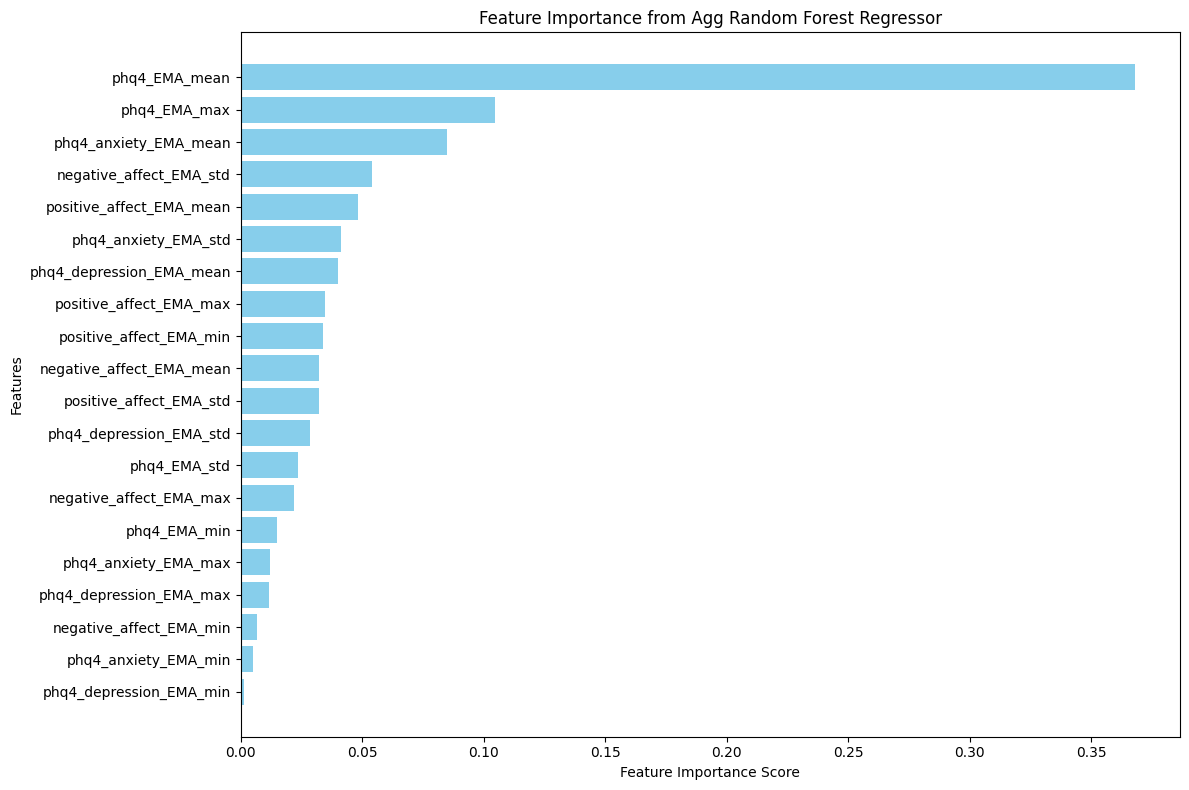

In [42]:
# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
features = X.columns
# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance from Agg Random Forest Regressor')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.tight_layout()
plt.show()

# Pre Survey Data Analysis

In [49]:
def clean_pre_survey_data(file_path):
    """
    Cleans the post-study survey dataset by:
    1. Removing irrelevant columns.
    2. Handling missing values using median imputation.
    3. Dropping rows with more than 50% missing data.

    Parameters:
    file_path (str): The path to the post-study CSV file.

    Returns:
    pd.DataFrame: Cleaned DataFrame ready for analysis.
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Remove irrelevant columns
    columns_to_drop = ['Unnamed: 0', 'date', 'BYAACQ_PRE']  # Adjust the columns based on your needs
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

    # Drop rows with more than 50% missing values
    df = df[df.isnull().mean(axis=1) <= 0.5]

    # Handle missing values using median imputation for numerical columns
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            df[column].fillna(df[column].median(), inplace=True)

    return df

# Example usage
cleaned_pre_df = clean_pre_survey_data('globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/pre.csv')
cleaned_pre_df.to_csv('globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/pre_cleaned.csv', index=False)
cleaned_pre_df.head()

/var/folders/f_/gv9ztf6972s0pmw0mkbfw0vc0000gn/T/ipykernel_34642/3616415130.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/var/folders/f_/gv9ztf6972s0pmw0mkbfw0vc0000gn/T/ipykernel_34642/3616415130.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

,pid,UCLA_10items_PRE,SocialFit_PRE,2waySSS_receiving_emotional_PRE,2waySSS_giving_emotional_PRE,2waySSS_giving_instrumental_PRE,2waySSS_receiving_instrumental_PRE,ERQ_reappraisal_PRE,ERQ_suppression_PRE,BRS_PRE,...,BriefCope_maladaptive_PRE,GQ_PRE,FSPWB_PRE,EDS_PRE,CEDH_PRE,BFI10_extroversion_PRE,BFI10_agreeableness_PRE,BFI10_conscientiousness_PRE,BFI10_neuroticism_PRE,BFI10_openness_PRE
0,INS-W_300,30.0,79.0,19.0,15.0,16.0,14.0,4.166667,5.00,3.000000,...,1.000000,32.0,27.0,9.0,20.0,6.0,5.0,8.0,6.0,8.0
1,INS-W_301,18.0,72.0,29.0,16.0,13.0,19.0,5.166667,4.50,3.833333,...,0.500000,30.0,43.0,1.0,5.0,4.0,6.0,7.0,5.0,9.0
2,INS-W_302,24.0,73.0,30.0,20.0,17.0,16.0,4.166667,4.00,3.333333,...,2.000000,28.0,45.0,0.0,1.0,8.0,8.0,7.0,6.0,6.0
3,INS-W_303,19.0,83.0,34.0,16.0,11.0,16.0,3.666667,1.50,4.000000,...,0.666667,36.0,48.0,6.0,3.0,6.0,4.0,6.0,4.0,8.0
4,INS-W_304,29.0,80.0,19.0,16.0,14.0,12.0,4.500000,4.75,2.333333,...,0.833333,35.0,32.0,17.0,39.0,4.0,9.0,6.0,9.0,7.0


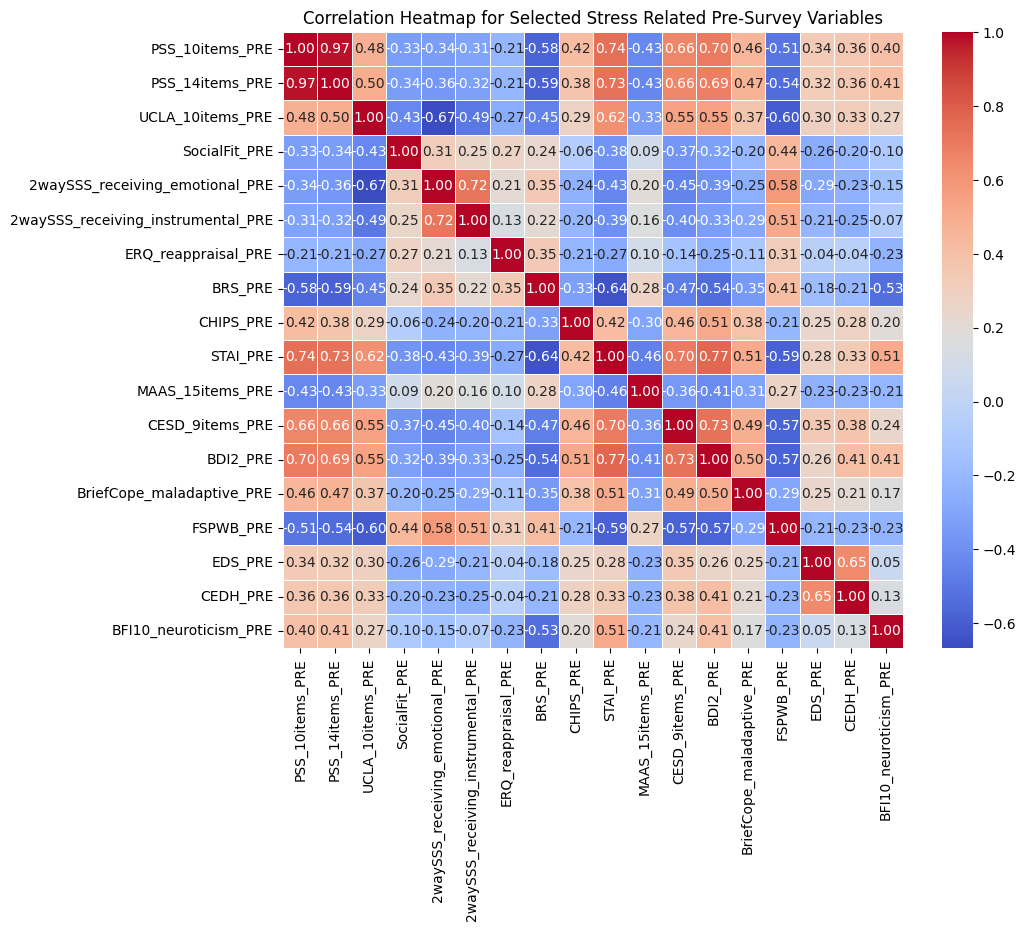

In [57]:
# Load the cleaned dataset
cleaned_file_path = 'globem-dataset-multi-year-datasets-for-longitudinal-human-behavior-modeling-generalization-1.1/INS-W_2/SurveyData/pre_cleaned.csv'  # Path to the cleaned data file
df = pd.read_csv(cleaned_file_path)

# Select relevant columns for correlation analysis
selected_columns = [
    'PSS_10items_PRE', 
    'PSS_14items_PRE',
    'UCLA_10items_PRE', 'SocialFit_PRE', '2waySSS_receiving_emotional_PRE', 
    '2waySSS_receiving_instrumental_PRE', 'ERQ_reappraisal_PRE', 
     'BRS_PRE', 'CHIPS_PRE',  'STAI_PRE', 'MAAS_15items_PRE', 'CESD_9items_PRE', 
    'BDI2_PRE', 'BriefCope_maladaptive_PRE', 
    'FSPWB_PRE', 'EDS_PRE', 'CEDH_PRE', 
    'BFI10_neuroticism_PRE'
]

# Filter the DataFrame for the selected columns
df_selected = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap for Selected Stress Related Pre-Survey Variables')
plt.show()